# Housing and Venue Data Analysis of Delhi

Here in this notebook we will analyze the Venues data and Housing prices data of Delhi.
Delhi is the Capital of India. It is among one of most populated cities in the world.
Due to a large no. of career and business opportunities in this region, people move to this region everyday.
Delhi has a population of over 2.5 crores which makes it one of the highly crowded cities of India. Therefore, it is necessary for anyone to do the analysis of Delhi in terms of economic wellness and locality status.
Analysis like this is very crucial for anyone who wants to open a new store, restaurant, shopping mall,or setup any other business.
It is also helpful for those who wants to buy a property or house or even if they just want to take a look at financial wellness of a region, it can be easily done using the results of this analysis.

First I will import the required libraries like pandas, numpy,geopy,folium,matplotlib and requests

In [1]:
#importing required libraries
%matplotlib inline
import os                 #for os related tasks
import pandas as pd       #for data manipulation
import numpy as np        #for mathematical calculations
import folium             # for visualization of maps
import requests           # for handling http requests
import matplotlib as mpl  # for plotting graphs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries imported')

Libraries imported


## Scraping Housing Prices in Delhi from makaan.in

It is website that is used for selling and purchasing of properties in delhi.

In [2]:
#creating an empty dataframe
df=pd.DataFrame(columns=['Name','Price range per sqft','Avg price per sqft','Price rise','Trend','View Properties'])

#scraping data in the tables at makaan.in
res=pd.read_html('https://www.makaan.com/price-trends/property-rates-for-buy-in-delhi',header=1)

#renaming column names
res[0].columns=['Name','Price range per sqft','Avg price per sqft','Price rise','Trend','View Properties']

#appending response recieved to main dataframe
df=df.append(res[0],ignore_index=True)

#looping through other urls and following similar procedures as done in previos lines of this cell
for n in np.arange(2,59):
    res=pd.read_html('https://www.makaan.com/price-trends/property-rates-for-buy-in-delhi?page={}'.format(n),header=1)
    res[0].columns=['Name','Price range per sqft','Avg price per sqft','Price rise','Trend','View Properties']
    df=df.append(res[0],ignore_index=True)

Taking a look at the data we scraped.

In [3]:
df

,Name,Price range per sqft,Avg price per sqft,Price rise,Trend,View Properties
0,Uttam Nagar,"843 - 13,333 / sqft","7,486 / sqft",5.4%,See trend,View 468 properties
1,Uttam Nagar west,"996 - 11,548 / sqft","6,762.32 / sqft",-25.7%,See trend,View 98 properties
2,Malviya Nagar,"2,310 - 14,222 / sqft","11,703.7 / sqft",41.1%,See trend,View 12 properties
3,laxmi nagar,"2,353 - 13,889 / sqft","11,858.86 / sqft",-16.3%,See trend,View 588 properties
4,Greater kailash 1,"2,900 - 43,333 / sqft","17,797.51 / sqft",-15%,See trend,View 8 properties
5,Saket,"3,435 - 18,621 / sqft","13,995.16 / sqft",-7%,See trend,View 53 properties
6,Defence Colony,"758 - 35,484 / sqft","20,939.86 / sqft",21.8%,See trend,View 25 properties
7,Safdarjung Enclave,"6,500 - 29,423 / sqft","21,743.02 / sqft",-20.9%,See trend,View 12 properties
8,Vasant Kunj,"2,165 - 1,85,714 / sqft","68,576.87 / sqft",7%,See trend,View 248 properties
9,Greater Kailash II,"3,343 - 18,765 / sqft","16,788.9 / sqft",53.4%,See trend,View 9 properties


After looking at the data we find that we only need the column that has name of the locality and avg price per sqft.
Therefore, I am dropping other unecessary columns like, price range per sqft, trends,price rise,view properties.

In [4]:
#removing unecessary columns price range per sqft, trends,price rise,view properties
df.drop(['Price range per sqft','Price rise','Trend','View Properties'],axis=1,inplace=True)
df

,Name,Avg price per sqft
0,Uttam Nagar,"7,486 / sqft"
1,Uttam Nagar west,"6,762.32 / sqft"
2,Malviya Nagar,"11,703.7 / sqft"
3,laxmi nagar,"11,858.86 / sqft"
4,Greater kailash 1,"17,797.51 / sqft"
5,Saket,"13,995.16 / sqft"
6,Defence Colony,"20,939.86 / sqft"
7,Safdarjung Enclave,"21,743.02 / sqft"
8,Vasant Kunj,"68,576.87 / sqft"
9,Greater Kailash II,"16,788.9 / sqft"


Now we need to drop rows having '-' as their average price per sqft because these are just null values.

In [5]:
#dropping rows with '-' as their avg price per sqft
df=df[df['Avg price per sqft']!='-'].reset_index(drop=True)
df

,Name,Avg price per sqft
0,Uttam Nagar,"7,486 / sqft"
1,Uttam Nagar west,"6,762.32 / sqft"
2,Malviya Nagar,"11,703.7 / sqft"
3,laxmi nagar,"11,858.86 / sqft"
4,Greater kailash 1,"17,797.51 / sqft"
5,Saket,"13,995.16 / sqft"
6,Defence Colony,"20,939.86 / sqft"
7,Safdarjung Enclave,"21,743.02 / sqft"
8,Vasant Kunj,"68,576.87 / sqft"
9,Greater Kailash II,"16,788.9 / sqft"


Now, we need to remove '/sqft' and ',' from 'Avg price per sqft column'.

In [6]:
avgPrice=[]
for price in df['Avg price per sqft'].values:
    # removing '/sqft' from end of the prices
    price=price.replace(' / sqft','')
    # removing ',' from values
    price=price.replace(',','')
    avgPrice.append(price)
df['Avg price per sqft']=avgPrice

Now, I am renaming the column names of the dataframe, converting 'AreaName' column into lowercase so that different cases do not cause any error in later steps and converting the column 'AvgPrice' into floating point integers for calculations because currently it is in string.

In [7]:
#converting Avg price per sqft column into float and renaming columns
df.rename(columns={'Avg price per sqft':'AvgPrice','Name':'AreaName'},inplace=True)
#converting names into lowercase
df['AreaName']=df['AreaName'].str.lower()
#converting data type of column to float
df.astype({'AvgPrice': 'float'}).dtypes

AreaName     object
AvgPrice    float64
dtype: object

Now, we are filtering our dataframe and deleting rows that does not make any sense like,

'near' will not lead us to any specific location, instead it will lead us to vicinity of a location

In [8]:
#removing rows with 'near' in it because it will not lead to an specific location instead vicinity of location
df=df[~df.AreaName.str.contains('near')].reset_index(drop=True)
df

,AreaName,AvgPrice
0,uttam nagar,7486
1,uttam nagar west,6762.32
2,malviya nagar,11703.7
3,laxmi nagar,11858.86
4,greater kailash 1,17797.51
5,saket,13995.16
6,defence colony,20939.86
7,safdarjung enclave,21743.02
8,vasant kunj,68576.87
9,greater kailash ii,16788.9


We need to remove more rows, those which has metro, road, highway, expressway, nh, noida, gurgaon, gurugram, peripheral and railway in its name because locations like metro line, highways, expressways and railways are not an area instead they can lie anywhere like some metro lines in Delhi are more than 50Km long and locations like Noida, Gurgaon and Gurugram are not in Delhi.

In [12]:
# removing rows with AreaName containing metro line,road,highway,expressway,nh,noida,gurgaon,gurugram,peripheral and railway line
df=df[~(df.AreaName.str.contains('metro') | df.AreaName.str.contains('road') | df.AreaName.str.contains('highway')|df.AreaName.str.contains('nh ') | df.AreaName.str.contains('expressway') | df.AreaName.str.contains('noida')| df.AreaName.str.contains('gurgaon')| df.AreaName.str.contains('peripheral')| df.AreaName.str.contains('gurugram')| df.AreaName.str.contains('railway'))].reset_index(drop=True)
df

,AreaName,AvgPrice
0,uttam nagar,7486
1,uttam nagar west,6762.32
2,malviya nagar,11703.7
3,laxmi nagar,11858.86
4,greater kailash 1,17797.51
5,saket,13995.16
6,defence colony,20939.86
7,safdarjung enclave,21743.02
8,vasant kunj,68576.87
9,greater kailash ii,16788.9


Exporting this dataframe to a csv file.

In [13]:
#exporting dataframe to csv
# df.to_csv('pricing.csv')

## Fetching Latitudes, Longitudes, PIN codes and District names of locations from mapmyindia geocoding api

First, we need to generate authorization header for accessing mapmyindia geocoding API

In [14]:
#making a POST request to mapmyindia oauth API to get authorization header for accessing Geocoding API
res=requests.post('https://outpost.mapmyindia.com/api/security/oauth/token',\
                 params={'grant_type': 'client_credentials',
                        'client_id':'Your Client ID',
                        'client_secret':'Your Client_secret'},\
                 headers={'Content-Type': 'application/x-www-form- urlencoded'})

#saving the token fetched into a variable named map_my_india_token
map_my_india_token=res.json()['access_token']

Now, we are passing this authorization header to the geocoding API with location to get Latitudes, Longitudes, PIN codes and District names of locations.

In [15]:
#using mapmyindia geocoding api to get latitude and longitude of areas in dataframe
latitudes=[]
longitudes=[]
pinCodes=[]
districts=[]
for area in df['AreaName'].values:
    res=requests.get('https://atlas.mapmyindia.com/api/places/geocode?address={},Delhi'.format(area),\
                headers={'Authorization':'{}'.format(map_my_india_token)})
    #appending fetched data to respective arrays
    latitudes.append(res.json()['copResults']['latitude'])
    longitudes.append(res.json()['copResults']['longitude'])
    pinCodes.append(res.json()['copResults']['pincode'])
    districts.append(res.json()['copResults']['district'])

Now, we need to merge this data into our existing dataframe

In [16]:
# merging latitudes and longitudes into new columns
df['Latitude']=pd.Series(latitudes)
df['Longitude']=pd.Series(longitudes)
df['PinCode']=pd.Series(pinCodes)
df['District']=pd.Series(districts)
df

,AreaName,AvgPrice,Latitude,Longitude,PinCode,District
0,uttam nagar,7486,28.618535,77.056782,110059,West District
1,uttam nagar west,6762.32,28.618535,77.056782,110059,West District
2,malviya nagar,11703.7,28.534883,77.210245,110017,South District
3,laxmi nagar,11858.86,28.635202,77.283208,110092,East District
4,greater kailash 1,17797.51,28.548714,77.236102,110048,South East Delhi District
5,saket,13995.16,28.523848,77.206773,110017,South District
6,defence colony,20939.86,28.573199,77.232795,110024,South East Delhi District
7,safdarjung enclave,21743.02,28.565741,77.194877,110029,South District
8,vasant kunj,68576.87,28.514980,77.153245,110070,South District
9,greater kailash ii,16788.9,28.534883,77.241845,110048,South East Delhi District


Before moving any further, first we need to check for any null value present in our dataframe. Lines of code in below cell prints 'No null values present!!' if there are no null values present

In [17]:
# Checking if there is any null value in whole dataframe
if((df.isnull().values.all()!=True)|(df.values.all()!=' ')|(df.values.all()!=np.nan)):
    print('No null values present!!')

No null values present!!


Its great that we have no null values in our dataset. Now, we are captializing 1st letter of each word for better representation of name.

In [18]:
#capitalizing area names
areaNames=[]
for area in df['AreaName'].values:
    area=area.title()
    areaNames.append(area)
df['AreaName']=areaNames
df.head()

,AreaName,AvgPrice,Latitude,Longitude,PinCode,District
0,Uttam Nagar,7486,28.618535,77.056782,110059,West District
1,Uttam Nagar West,6762.32,28.618535,77.056782,110059,West District
2,Malviya Nagar,11703.7,28.534883,77.210245,110017,South District
3,Laxmi Nagar,11858.86,28.635202,77.283208,110092,East District
4,Greater Kailash 1,17797.51,28.548714,77.236102,110048,South East Delhi District


### Creating map of Delhi with Areas on top of it

In [9]:
map_delhi=folium.Map(location=[28.644800, 77.216721],zoom_start=11)

#adding markers to map
for lat,lng,area,pin,dist in zip(df['Latitude'],df['Longitude'],df['AreaName'],df['PinCode'],df['District']) :
    label='{},{}-{}'.format(area,dist,pin)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7).add_to(map_delhi)

map_delhi

Exporting this dataframe to a csv file.

In [20]:
#exporting this dataframe
# df.to_csv('area_lat_long.csv')

## Finding maximum 100 venues in the radius of 1000m from location

Now, we have completed a section of this project. So, let's get maximum 100 venues like ATM, Restaurant, etc. that lies within 1000m radius from the longitude and latitude of center of location. This data will help us in analyzing what kind of area that particular location is.

In [21]:
#Foursquare API Credentials for accessing the API
CLIENT_ID = 'your Foursquare ID'
CLIENT_SECRET = 'your Foursquare Secret'
VERSION = '20191020' # Foursquare API version

#setting radius=1000m and max limit=100 
radius = 1000
LIMIT = 100

#creating an empty array for venues
venues = []

#looping through each row of dataframe
for lat,lng,area,pin,dist in zip(df['Latitude'],df['Longitude'],df['AreaName'],df['PinCode'],df['District']) :
    #making a GET request to foursquare venues API
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    #appending each fetched result to venues array
    for venue in results:
        venues.append(( 
            area,
            dist,
            pin,
            lat, 
            lng, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

So we have successfully fetched required data from foursquare API but it is in the form of array. So, now we have to convert it to a dataframe.

In [22]:
#converting array to dataframe
venues_df=pd.DataFrame(venues)

#naming columns of dataframe
venues_df.columns=['AreaName','District','PinCode','AreaLatitude','AreaLongitude','Venue','VenueLatitude','VenueLongitude','VenueCategory']
print('Shape:',venues_df.shape)
venues_df.head()

Shape: (9473, 9)


,AreaName,District,PinCode,AreaLatitude,AreaLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Uttam Nagar,West District,110059,28.618535,77.056782,Uttam Nagar West Metro Station,28.621729,77.055724,Train Station
1,Uttam Nagar,West District,110059,28.618535,77.056782,Litti Haat,28.616531,77.052722,Indian Restaurant
2,Uttam Nagar,West District,110059,28.618535,77.056782,Kali Ghata,28.614098,77.059164,Indian Restaurant
3,Uttam Nagar,West District,110059,28.618535,77.056782,YES Bank ATM,28.612810,77.059320,ATM
4,Uttam Nagar,West District,110059,28.618535,77.056782,Polka's,28.624726,77.062335,Bakery


Exporting this dataframe to a csv file.

In [23]:
#exporting this dataframe
# venues_df.to_csv('venue_lat_long.csv')

To get an idea of what we have fetched we are checking no. of venues fetched for each area in our database.

In [24]:
venues_df.groupby(['AreaName'])['Venue'].count()

AreaName
10 Dwaraka Marg                          7
10 Sector Dwarka                         9
A1 Block Paschim Vihar Delhi             9
Abul Fazal Enclave                       6
Abul Fazal Enclave Jamia Nagar           4
Abul Fazal Enclave Part 2 New Delhi      5
Aerocity                                44
Akshardham                              13
Alaknanda                               29
Alaknanda Gangotri Enclave               8
Ambica Vihar                             4
Anand Lok                               24
Anand Niketan                           14
Anand Vihar                              6
Antriksh Bhawan                        100
Anupam Garden 10Th Lane                 13
Arjun Nagar                             83
Ashirwad                                 8
Ashok Nagar                             31
Ashok Vihar                             11
Ashok Vihar Phase-1                     11
Ashram                                   8
Aya Nagar                                5
Az

For 647 different areas we have about 9473 venues which is a good. Let's check how many types of venues we have in total.

In [25]:
print('No. of unique venues :',len(venues_df['VenueCategory'].unique()))

No. of unique venues : 247


## Analyzing venues in each area

As we have now collected all the data that we require to complete this project. So, after successful data collection let's move onto analyzing this data.

One Hot Encoding is a process through which we convert categorical values into numerical values. Here, in this case we are converting 100 most venues into their categorial binary value i.e, either 0 or 1.

In [26]:
#one hot encoding
delhi_venue_onehot=pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

#adding AreaName,District and PinCode columns
delhi_venue_onehot['AreaName']=venues_df['AreaName']
delhi_venue_onehot['District']=venues_df['District']
delhi_venue_onehot['PinCode']=venues_df['PinCode']
delhi_venue_onehot['Latitude']=venues_df['AreaLatitude']
delhi_venue_onehot['Longitude']=venues_df['AreaLongitude']

#moving postal code,borough, neighborhood and venue columns to starting
cols = delhi_venue_onehot.columns.tolist()
cols.insert(0, cols.pop(cols.index('AreaName')))
cols.insert(1, cols.pop(cols.index('District')))
cols.insert(2, cols.pop(cols.index('PinCode')))
cols.insert(2, cols.pop(cols.index('Latitude')))
cols.insert(2, cols.pop(cols.index('Longitude')))

#reindexing columns
delhi_venue_onehot=delhi_venue_onehot.reindex(columns=cols)

print('Shape:',delhi_venue_onehot.shape)
delhi_venue_onehot.head()

Shape: (9473, 252)


,AreaName,District,Longitude,Latitude,PinCode,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,...,University,Vegetarian / Vegan Restaurant,Video Game Store,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Uttam Nagar,West District,77.056782,28.618535,110059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Uttam Nagar,West District,77.056782,28.618535,110059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttam Nagar,West District,77.056782,28.618535,110059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Uttam Nagar,West District,77.056782,28.618535,110059,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Uttam Nagar,West District,77.056782,28.618535,110059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we will find frequency of each type of venue occuring in an area. We can do this by using groupby() and mean() methods.

In [27]:
delhi_venue_freq=delhi_venue_onehot.groupby(['AreaName','District','PinCode']).mean().reset_index()
delhi_venue_freq

,AreaName,District,PinCode,Longitude,Latitude,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,...,University,Vegetarian / Vegan Restaurant,Video Game Store,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,10 Dwaraka Marg,South West District,110045,77.087924,28.598530,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,10 Sector Dwarka,South West District,110075,77.057569,28.590611,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,A1 Block Paschim Vihar Delhi,West District,110063,77.093265,28.669306,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,Abul Fazal Enclave,South East Delhi District,110025,77.307199,28.546370,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Abul Fazal Enclave Jamia Nagar,South East Delhi District,110025,77.297802,28.555496,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5,Abul Fazal Enclave Part 2 New Delhi,South East Delhi District,110025,77.299861,28.549208,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
6,Aerocity,New Delhi District,110037,77.121662,28.552016,0.000000,0.022727,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
7,Akshardham,East District,110092,77.278330,28.612332,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
8,Alaknanda,South East Delhi District,110019,77.250154,28.527939,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
9,Alaknanda Gangotri Enclave,South East Delhi District,110019,77.252141,28.524453,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


Now, we will sort the frequencies of venues and find 5 most common venues occuring in an area.

In [28]:
num_top_venues=5

#creating columns
indicator=['st','nd','rd']
areaCol=['AreaName','District','PinCode','Latitude','Longitude']
freqCol=[]

#creating column names
for n in range(1,num_top_venues+1):
    try:
        freqCol.append('{}{} most common venue'.format(n,indicator[n-1]))
    except:
        freqCol.append('{}{} most common venue'.format(n,'th'))
cols=areaCol+freqCol

#creating new dataframe
delhi_venue_top=pd.DataFrame(columns=cols)
delhi_venue_top['AreaName']=delhi_venue_freq['AreaName']
delhi_venue_top['District']=delhi_venue_freq['District']
delhi_venue_top['PinCode']=delhi_venue_freq['PinCode']
delhi_venue_top['Latitude']=delhi_venue_freq['Latitude']
delhi_venue_top['Longitude']=delhi_venue_freq['Longitude']
for n in range(delhi_venue_freq.shape[0]):
    row_categories = delhi_venue_freq.iloc[n, :].iloc[5:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    delhi_venue_top.iloc[n, 5:] = row_categories_sorted.index.values[0:num_top_venues]

delhi_venue_top

,AreaName,District,PinCode,Latitude,Longitude,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue
0,10 Dwaraka Marg,South West District,110045,28.598530,77.087924,Department Store,Bank,Science Museum,Gym,Fast Food Restaurant
1,10 Sector Dwarka,South West District,110075,28.590611,77.057569,Fast Food Restaurant,Café,Department Store,Indian Restaurant,Electronics Store
2,A1 Block Paschim Vihar Delhi,West District,110063,28.669306,77.093265,Coffee Shop,Hotel,Food Truck,Indian Restaurant,Chinese Restaurant
3,Abul Fazal Enclave,South East Delhi District,110025,28.546370,77.307199,Fast Food Restaurant,Market,Diner,Park,Hotel
4,Abul Fazal Enclave Jamia Nagar,South East Delhi District,110025,28.555496,77.297802,Indian Restaurant,Playground,Arcade,Yoga Studio,Food
5,Abul Fazal Enclave Part 2 New Delhi,South East Delhi District,110025,28.549208,77.299861,Indian Restaurant,Park,Market,Fast Food Restaurant,Flower Shop
6,Aerocity,New Delhi District,110037,28.552016,77.121662,Hotel,Indian Restaurant,Spa,Bed & Breakfast,Hotel Bar
7,Akshardham,East District,110092,28.612332,77.278330,Dessert Shop,Restaurant,Food & Drink Shop,Bus Station,North Indian Restaurant
8,Alaknanda,South East Delhi District,110019,28.527939,77.250154,Restaurant,Coffee Shop,Convenience Store,BBQ Joint,Market
9,Alaknanda Gangotri Enclave,South East Delhi District,110019,28.524453,77.252141,BBQ Joint,Restaurant,Market,Thai Restaurant,Gym


With this data we can find that which area is rich in which type of facility or venue.

Exporting this dataframe to a csv file.

In [29]:
#exporting this dataframe
# delhi_venue_top.to_csv('delhi_venue_top.csv')

# Clustering Areas

As data preparation for this part is completed. So, now we can cluster these areas using KMeans clustering. KMeans is a clustering algorithm that works on minimizing the intra-cluster distances and maximizing the inter-cluster distances. It is an unsupervised algorithm.

In [34]:
k_clusters=5

delhi_venue_top_clustering=delhi_venue_freq.drop(['AreaName','District','PinCode','Latitude','Longitude'],axis=1)

k_means=KMeans(n_clusters=k_clusters,random_state=0)
k_means.fit(delhi_venue_top_clustering)

delhi_df_clustered=delhi_venue_freq.loc[:, :'Latitude']
delhi_df_clustered['Cluster']=k_means.labels_

delhi_df_clustered=delhi_df_clustered.join(delhi_venue_top.drop(['District','PinCode','Latitude','Longitude'],1).set_index('AreaName'),on='AreaName')
#sorting freqColumns and Cluster column collectively

delhi_df_clustered=delhi_df_clustered.sort_values(['Cluster']+freqCol).reset_index(drop=True)
delhi_df_clustered

,AreaName,District,PinCode,Longitude,Latitude,Cluster,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue
0,Sadar Bazaar,New Delhi District,110010,77.120554,28.591759,0,ATM,Convenience Store,Mobile Phone Shop,Café,Shoe Store
1,Tigri,South District,110062,77.238326,28.511275,0,ATM,Indian Restaurant,Electronics Store,Plaza,Fast Food Restaurant
2,Deoli Gaon Nai Basti,South District,110062,77.234013,28.505528,0,ATM,Indian Restaurant,Electronics Store,Trail,Athletics & Sports
3,Devli Extention Deoli Gaon Nai Basti,South District,110062,77.234013,28.505528,0,ATM,Indian Restaurant,Electronics Store,Trail,Athletics & Sports
4,Devli Nai Basti,South District,110062,77.234013,28.505528,0,ATM,Indian Restaurant,Electronics Store,Trail,Athletics & Sports
5,Rajinder Nagar,North East District,110094,77.287433,28.703218,0,ATM,Indian Restaurant,Pizza Place,Fabric Shop,Fried Chicken Joint
6,Bindapur,South West District,110059,77.068586,28.610709,0,ATM,Indian Restaurant,Pool,Mobile Phone Shop,Flower Shop
7,Sitapuri,South West District,110059,77.075381,28.607997,0,ATM,Pool,Market,Business Service,Health & Beauty Service
8,Gulabhi Bagh Om Vihar,West District,110059,77.052640,28.626044,0,ATM,Train Station,Bakery,Mobile Phone Shop,Department Store
9,Om Vihar,West District,110059,77.052640,28.626044,0,ATM,Train Station,Bakery,Mobile Phone Shop,Department Store


Exporting this resulting dataframe to a csv file.

In [35]:
#exporting this dataframe
# delhi_df_clustered.to_csv('delhi_df_clustered.csv')

## Visualizing clusters on Delhi Map

It is now time to see what we have obtained and which areas are better for which purpose. Here, we are using folium which is python library for visualizing geo-spatial data.

In [8]:
map_clusters=folium.Map(location=[28.644800, 77.216721],zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat,lng,area,pin,dist,cluster in zip(delhi_df_clustered['Latitude'],delhi_df_clustered['Longitude'],delhi_df_clustered['AreaName'],delhi_df_clustered['PinCode'],delhi_df_clustered['District'],delhi_df_clustered['Cluster']) :
    label = folium.Popup('{},({}-{}): Cluster({})'.format(area, pin, dist, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## The Results of this clustering are as follows:

- Cluster-0 (tomato) has higher no. of ATMs, Indian Restaurants, Markets, Shops. These are the locations where    people go for shopping or hangout.
- Cluster-1 (mediumpurple) has higher no. of Hotels, Asian Restaurants, Gyms and Neighborhoods. So these are residental areas.
- Cluster-2 (mediumtorquoise) has higher no. of Gardens and parks. These areas are more green than other areas.
- Cluster-3 (aquamarine) has airports and also some high end facility providers. These areas are downtown and posh areas.
- Cluster-4 (burlywood) has higher no. of metro stations, pizza places and other businesses. These areas are well connected areas by metros.

## Analyzing Housing Data

Now, we are normalizing housing dataframe to create a rating scale from (0-100) for housing prices. But First we need to convert data type of average price column from object to float64 for calculation.

In [46]:
#converting data type of avgPrice column to float
df['AvgPrice']=df['AvgPrice'].astype(float)
df.astype({'AvgPrice': 'float'}).dtypes

AreaName      object
AvgPrice     float64
Latitude     float64
Longitude    float64
PinCode       object
District      object
dtype: object

I am normalizing the dataset using Min-Max Method that scales values from 0 to 1 making it easier to understand and work on data. I am also multiplying the results obtained by 100 to convert it to 0-100 rating scale.

In [68]:
#Normalizing using Min-Max
df['NormPrice']=((df['AvgPrice']-df['AvgPrice'].min())/(df['AvgPrice'].max()-df['AvgPrice'].min()))*100
df

,AreaName,AvgPrice,Latitude,Longitude,PinCode,District,NormPrice
0,Uttam Nagar,7486.00,28.618535,77.056782,110059,West District,7.169510
1,Uttam Nagar West,6762.32,28.618535,77.056782,110059,West District,6.470488
2,Malviya Nagar,11703.70,28.534883,77.210245,110017,South District,11.243497
3,Laxmi Nagar,11858.86,28.635202,77.283208,110092,East District,11.393370
4,Greater Kailash 1,17797.51,28.548714,77.236102,110048,South East Delhi District,17.129667
5,Saket,13995.16,28.523848,77.206773,110017,South District,13.456878
6,Defence Colony,20939.86,28.573199,77.232795,110024,South East Delhi District,20.164945
7,Safdarjung Enclave,21743.02,28.565741,77.194877,110029,South District,20.940739
8,Vasant Kunj,68576.87,28.514980,77.153245,110070,South District,66.178781
9,Greater Kailash Ii,16788.90,28.534883,77.241845,110048,South East Delhi District,16.155424


Exporting this resulting dataframe to a csv file.

In [69]:
#exporting this dataframe
# df.to_csv('df_normalized.csv')

Now, I will create bins so that I can easily categorize areas based on their price ratings.

In [70]:
#creating bins
bins=np.linspace(min(df['NormPrice']),max(df['NormPrice']),6)
bins

array([  0.,  20.,  40.,  60.,  80., 100.])

Creating a histogram to easily understand the nature of data.

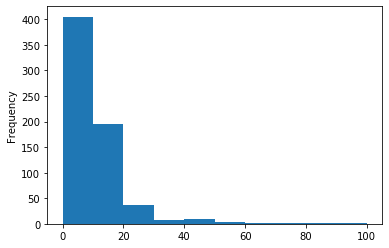

In [71]:
#generating histogram
df['NormPrice'].plot(kind='hist',xticks=bins)
plt.show()

So now we will assign categories to the areas based on their price ratings.
##### Categories:
- Rating(0-20)=>    Category I
- Rating(21-40)=>   Category II
- Rating(41-60)=>   Category III
- Rating(61-80)=>   Category IV
- Rating(81-100)=>  Category V

In [72]:
#assigning bins to the normalized price
bin_category=['Category I','Category II','Category III','Category IV','Category V']
bin_values=[1,2,3,4,5]
df['EconomicCategory']=pd.cut(df['NormPrice'],bins,labels=bin_category,include_lowest=True)
df['CategoryValue']=pd.cut(df['NormPrice'],bins,labels=bin_values,include_lowest=True)
df

,AreaName,AvgPrice,Latitude,Longitude,PinCode,District,NormPrice,EconomicCategory,CategoryValue
0,Uttam Nagar,7486.00,28.618535,77.056782,110059,West District,7.169510,Category I,1
1,Uttam Nagar West,6762.32,28.618535,77.056782,110059,West District,6.470488,Category I,1
2,Malviya Nagar,11703.70,28.534883,77.210245,110017,South District,11.243497,Category I,1
3,Laxmi Nagar,11858.86,28.635202,77.283208,110092,East District,11.393370,Category I,1
4,Greater Kailash 1,17797.51,28.548714,77.236102,110048,South East Delhi District,17.129667,Category I,1
5,Saket,13995.16,28.523848,77.206773,110017,South District,13.456878,Category I,1
6,Defence Colony,20939.86,28.573199,77.232795,110024,South East Delhi District,20.164945,Category II,2
7,Safdarjung Enclave,21743.02,28.565741,77.194877,110029,South District,20.940739,Category II,2
8,Vasant Kunj,68576.87,28.514980,77.153245,110070,South District,66.178781,Category IV,4
9,Greater Kailash Ii,16788.90,28.534883,77.241845,110048,South East Delhi District,16.155424,Category I,1


Exporting this resulting dataframe to a csv file.

In [73]:
#exporting this dataframe
# df.to_csv('df_categorized.csv')

## Plotting area-wise Economic Rating on map

Higher the prices of houses higher is the chance that people with better economic conditions live in that area.

People living in area of Category V has highest economic strength and people living in area of Category I has lowest economic strength.

In [4]:
map_rating=folium.Map(location=[28.644800, 77.216721],zoom_start=11)

# set color scheme for the category
rainbow = ['#97ff55','#4177e8','#ec2bec','#275d04','#f86136']

# add markers to the map
markers_colors = []
for lat,lng,area,pin,dist,category,value in zip(df['Latitude'],df['Longitude'],df['AreaName'],df['PinCode'],df['District'],df['EconomicCategory'],df['CategoryValue']) :
    label = folium.Popup('{},({}-{}):({})'.format(area, pin, dist,category ), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[value-1],
        fill=True,
        fill_color=rainbow[value-1],
        fill_opacity=0.5).add_to(map_rating)
       
map_rating